In [13]:
#libraries
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Flatten, Dropout, Dense, Conv2D, MaxPooling2D
from pathlib import Path
from matplotlib import pyplot as plt

In [14]:
#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("shape:\nx_train and y_train")
print(x_train.shape)
print(y_train.shape)

print("\nx_test and y_test")
print(x_test.shape)
print(y_test.shape)

shape:
x_train and y_train
(50000, 32, 32, 3)
(50000, 1)

x_test and y_test
(10000, 32, 32, 3)
(10000, 1)


In [15]:
#normalize input
print(x_train[0][0][0])

x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /=255

#test
print(x_train[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


In [16]:
#convert output to binary class
print(y_train[0])

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#test
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
#create model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = (32, 32, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [18]:
#compile and train
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 50, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/50
782/782 [==============================] - 9s 9ms/step - loss: 1.5476 - accuracy: 0.4340 - val_loss: 1.2104 - val_accuracy: 0.5702
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.1550 - accuracy: 0.5901 - val_loss: 1.0028 - val_accuracy: 0.6462
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 0.9782 - accuracy: 0.6565 - val_loss: 0.8918 - val_accuracy: 0.6902
Epoch 4/50
782/782 [==============================] - 7s 8ms/step - loss: 0.8643 - accuracy: 0.6959 - val_loss: 0.8017 - val_accuracy: 0.7219
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 0.7985 - accuracy: 0.7195 - val_loss: 0.7330 - val_accuracy: 0.7507
Epoch 6/50
782/782 [==============================] - 7s 8ms/step - loss: 0.7434 - accuracy: 0.7380 - val_loss: 0.6986 - val_accuracy: 0.7586
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.6941 - accuracy: 0.7555 - val_loss: 0.6688 - val_accuracy: 0.7713
Epoch 

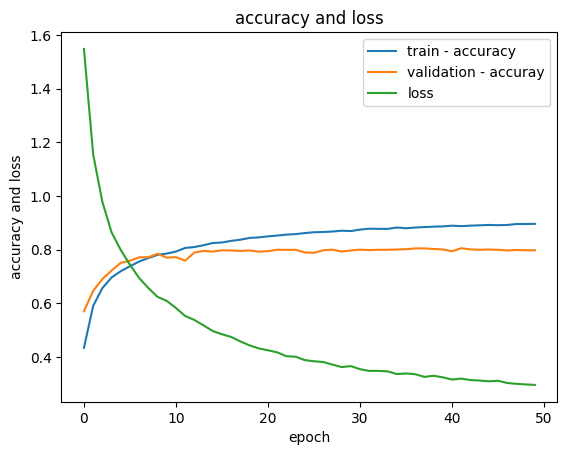

In [21]:
#plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['train - accuracy', 'validation - accuray', 'loss', 'validation - loss'], loc='upper right')
plt.show()

In [22]:
#save model
structure = model.to_json()
File = Path('structure.json')
File.write_text(structure)

#save weights
model.save_weights('weights.h5')